The Cauchy distribution has a number of features that make
it an "evil" distribution; in particular, the lack of existence
of its moments make it particularly hairy to work with.

Something that I always found counterintuitive is the fact that
the weak law of large numbers does not hold for the Cauchy distribution
(we will work exclusively with the standard Cauchy distribution throughout
this article).

Undergraduate probability theory will tell you that the weak law of large
numbers can be proved assuming finite first and second moments through
an application of Chebyshev's inequality; this won't work for the Cauchy distribution
since it has no moments! But, that's too weird right? Intuitively, you have
just as many positive values as negative values (assuming that you're sampling i.i.d.
Cauchy random variables). Not to mention that you're dividing by $ n $, which
ends up getting really big! Shouldn't they cancel out, in some sense, in the long run?

There are stronger proofs for laws of large numbers that loosen some of the
assumptions made in undergraduate probability, but those are somewhat outside
of the scope of this article; we will opt to specify. A more convincing proof for the lack
of convergence of the quantity

$$
\bar{X}_n := \frac{1}{n}\sum_{i=1}^n X_i
$$

where $ X_i \sim $ Cauchy(0, 1) relies on characteristic functions; namely,
that if $ X_1, X_2, \cdots, X_n $ are i.i.d. Cauchy(0,1) random variables,
then $ \bar{X}_n \sim $ Cauchy(0, 1) as well. This would imply that,
regardless of how many random variables you sum up in your sample mean,
you always end up with the same damn thing.

The proof isn't presented here, but is not so hard (go look it up or prove it yourself).
It's certainly true, but it's so \emph{weird}. The point of this article is to verify
this fact using simulation.

First, we'll show what's "supposed to happen" if you get nice
law of large number results. We'll compute and chart the sample mean
for a whole bunch of standard Normal random variables.

In [20]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Set seed to make results reproducible
np.random.seed(8008135)

In [21]:
# Generate standard normals and compute rolling mean (i.e. \bar{X}_n as n \to \infty)
normals = np.random.normal(size=10000)
means = np.cumsum(normals) / np.linspace(1,10000,10000)

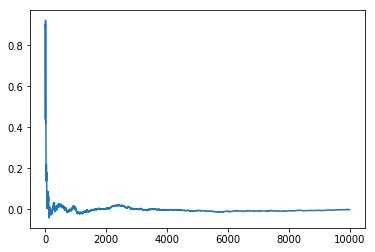

In [22]:
plt.plot(means)

See, this makes sense. We get the average thing going to the average.

Now, we'll do the same thing with Cauchy random variables.

In [23]:
cauchies = np.random.standard_cauchy(size=100000)
cauchy_means = np.cumsum(cauchies) / np.linspace(1, 100000, 100000)

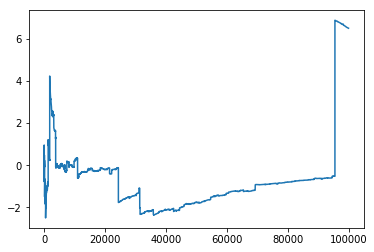

In [24]:
plt.plot(cauchy_means)

Ain't that cool! Now, this definitely relies on the implementation of the standard Cauchy
sampling proceduce built in to Numpy, but disregarding that one can clearly see the Cauchy
distribution tends to freak out occasionally (i.e. it has fat tails).

Just to double check against the software sampling procedure
(as a sort of sanity check), we can use the fact that if $ X, Y \sim N(0, 1) $ and
if $ X $ and $ Y $ are independent, then $ \frac{X}{Y} \sim $ Cauchy(0, 1).

In [31]:
normals_1 = np.random.normal(size=100000)
normals_2 = np.random.normal(size=100000)
cauchy_ratio = normals_1 / normals_2
ratio_means = np.cumsum(cauchy_ratio) / np.linspace(1, 100000, 100000)

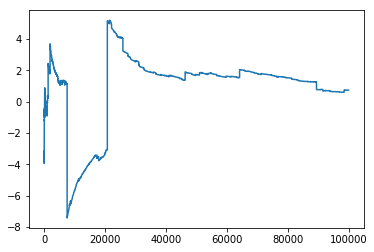

In [32]:
plt.plot(ratio_means)

We get something that's still pretty bad.